## Importing


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Processing

## Training 

In [6]:
#from https://keras.io/api/data_loading/image/
training_set=tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",#labels are generated from the directory structure
    label_mode="categorical",#"categorical" means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
    #if it was lesser classes then int label
    class_names=None,
    color_mode="rgb",
    batch_size=32,# to speed up increase it
    image_size=(128,128),
    shuffle=True,#at time of feeding shuffle and pass it,reduces bias
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


## validation image pre processing

In [7]:
#from https://keras.io/api/data_loading/image/
validation_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",#labels are generated from the directory structure
    label_mode="categorical",#"categorical" means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
    #if it was lesser classes then int label
    class_names=None,
    color_mode="rgb",
    batch_size=32,# to speed up increase it
    image_size=(128,128),
    shuffle=True,#at time of feeding shuffle and pass it,reduces bias
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 15.75  53.75  14.75]
   [ 17.5   55.5   16.5 ]
   [ 15.5   53.5   16.5 ]
   ...
   [111.25 160.25 104.25]
   [ 99.5  148.5   93.5 ]
   [ 87.75 136.75  81.75]]

  [[ 17.    55.    16.  ]
   [ 18.25  56.25  17.25]
   [ 15.5   53.5   16.5 ]
   ...
   [106.25 155.25  99.25]
   [ 92.75 141.75  86.75]
   [ 87.   136.    81.  ]]

  [[ 19.    57.    16.  ]
   [ 19.75  57.75  18.75]
   [ 16.5   54.5   15.5 ]
   ...
   [116.25 165.25 109.25]
   [102.75 151.75  96.75]
   [ 91.75 140.75  85.75]]

  ...

  [[106.25 149.25  77.5 ]
   [ 86.75 127.75  60.25]
   [ 27.25  66.75   7.25]
   ...
   [106.75 147.75  80.25]
   [118.   158.25  94.5 ]
   [120.5  160.5   98.5 ]]

  [[ 93.25 137.    62.75]
   [ 94.75 136.    66.5 ]
   [ 33.75  73.75  12.25]
   ...
   [ 99.75 140.75  72.25]
   [140.   181.   115.  ]
   [129.25 169.25 106.25]]

  [[ 83.25 127.25  51.25]
   [ 96.75 138.25  68.25]
   [ 52.    92.    30.5 ]
   ...
   [109.5  150.5   81.  ]
   [109.5  150.5   84.5 ]
   [121.25 161.25  9

## building model


### to avoid overshooting

1.reduce learning rate
2.may be underfitting so increase neurons
3.add more convolutin layer to take more features

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [11]:
model=Sequential()

In [19]:
# building convultional layer

In [12]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

C:\Users\WELCOME\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
'''
Conv2D: This is a 2D convolutional layer that applies a convolution operation to the input.
filters=32: This specifies that the layer will learn 32 different filters (or kernels). 
Each filter will learn to detect different features in the input images.
kernel_size=3: This indicates that each filter has a size of 3x3 pixels. 
A smaller kernel size helps capture fine details.
padding='same': This means that the output feature map will have the same 
spatial dimensions (width and height) as the input. 
Padding is added to maintain the dimensions.
activation='relu': The Rectified Linear Unit (ReLU) activation function is 
applied to introduce non-linearity, allowing the model to learn complex patterns.
input_shape=[128, 128, 3]: This specifies the shape of the input images. 
Here, the images are 128x128 pixels with 3 color channels (RGB).
'''

"\nConv2D: This is a 2D convolutional layer that applies a convolution operation to the input.\nfilters=32: This specifies that the layer will learn 32 different filters (or kernels). \nEach filter will learn to detect different features in the input images.\nkernel_size=3: This indicates that each filter has a size of 3x3 pixels. \nA smaller kernel size helps capture fine details.\npadding='same': This means that the output feature map will have the same \nspatial dimensions (width and height) as the input. \nPadding is added to maintain the dimensions.\nactivation='relu': The Rectified Linear Unit (ReLU) activation function is \napplied to introduce non-linearity, allowing the model to learn complex patterns.\ninput_shape=[128, 128, 3]: This specifies the shape of the input images. \nHere, the images are 128x128 pixels with 3 color channels (RGB).\n"

In [14]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
'''
MaxPool2D: This layer performs max pooling, which reduces the spatial dimensions of the feature maps.
pool_size=2: This indicates that the pooling operation will take the maximum value from a 2x2 window.
strides=2: This specifies that the pooling window will move 2 pixels at a time. 
This helps to down-sample the feature maps,
reducing the number of parameters and computation in the network.
'''

'\nMaxPool2D: This layer performs max pooling, which reduces the spatial dimensions of the feature maps.\npool_size=2: This indicates that the pooling operation will take the maximum value from a 2x2 window.\nstrides=2: This specifies that the pooling window will move 2 pixels at a time. \nThis helps to down-sample the feature maps,\nreducing the number of parameters and computation in the network.\n'

In [15]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [17]:
print(x.shape)  # Should print something like (batch_size, 128, 128, 3)

(32, 128, 128, 3)


## flattening

In [18]:
model.add(Dropout(0.25))#to avoid overfitting

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.4))#to avoid overfitting

In [21]:
#output layer
model.add(Dense(units=38,activation='softmax'))#38classes prob of each class is given by softmax

## compiling model

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
'''
optimizer='adam': The Adam optimizer is used for training the model. 
It adapts the learning rate for each parameter, making it efficient for large datasets.
loss='categorical_crossentropy': This loss function is used for multi-class 
classification problems. It measures the difference between the predicted probabilities 
and the actual class labels.
metrics=['accuracy']: This specifies that accuracy will be tracked during training and evaluation.
'''

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

"\noptimizer='adam': The Adam optimizer is used for training the model. \nIt adapts the learning rate for each parameter, making it efficient for large datasets.\nloss='categorical_crossentropy': This loss function is used for multi-class \nclassification problems. It measures the difference between the predicted probabilities \nand the actual class labels.\nmetrics=['accuracy']: This specifies that accuracy will be tracked during training and evaluation.\n"

## training the model

In [25]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=6)

Epoch 1/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3341s 2s/step - accuracy: 0.4141 - loss: 2.0648 - val_accuracy: 0.8126 - val_loss: 0.5952
Epoch 2/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2927s 1s/step - accuracy: 0.8334 - loss: 0.5235 - val_accuracy: 0.8927 - val_loss: 0.3310
Epoch 3/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3031s 1s/step - accuracy: 0.9035 - loss: 0.2976 - val_accuracy: 0.9212 - val_loss: 0.2437
Epoch 4/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 9863s 4s/step - accuracy: 0.9349 - loss: 0.2005 - val_accuracy: 0.9509 - val_loss: 0.1506
Epoch 5/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 69380s 32s/step - accuracy: 0.9523 - loss: 0.1449 - val_accuracy: 0.9441 - val_loss: 0.1802
Epoch 6/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3269s 1s/step - accuracy: 0.9618 - loss: 0.1133 - val_accuracy: 0.9328 - val_loss: 0.2357


## model evaluation


In [26]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 638s 291ms/step - accuracy: 0.9602 - loss: 0.1266


In [27]:
print(train_loss,train_acc)

0.11451005935668945 0.9635820388793945


In [28]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 150s 273ms/step - accuracy: 0.9353 - loss: 0.2280


In [29]:
print(val_loss,val_acc)

0.23574617505073547 0.9328477382659912


## saving model


In [30]:
model.save("trainedmodel.keras")

In [31]:
training_history.history

{'accuracy': [0.6090760231018066,
  0.8600042462348938,
  0.9133224487304688,
  0.9396542906761169,
  0.9556440711021423,
  0.964037299156189],
 'loss': [1.3228598833084106,
  0.440315842628479,
  0.26794400811195374,
  0.1831008493900299,
  0.13603968918323517,
  0.1079302728176117],
 'val_accuracy': [0.8125995993614197,
  0.8926701545715332,
  0.9211814403533936,
  0.9508877992630005,
  0.9441156387329102,
  0.9328477382659912],
 'val_loss': [0.5952483415603638,
  0.3309553563594818,
  0.2437208890914917,
  0.15062174201011658,
  0.18016912043094635,
  0.23574627935886383]}

In [32]:
#recording the history in json
import json
with open("traininghist.json","w") as f:
    json.dump(training_history.history,f)


## accuracy visualisation

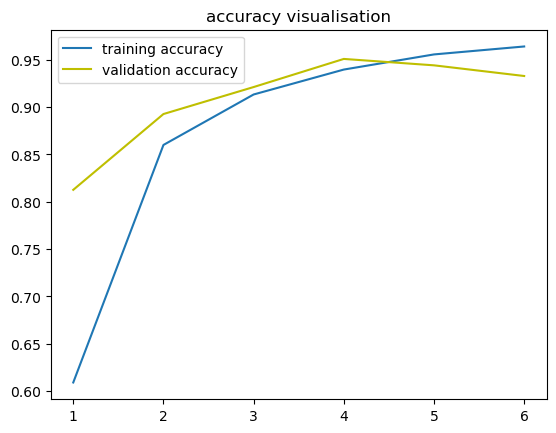

In [34]:
iter=[i for i in range(1,7)]
plt.plot(iter,training_history.history['accuracy'],label="training accuracy")
plt.plot(iter,training_history.history['val_accuracy'],color="y",label="validation accuracy")
plt.title("accuracy visualisation")
plt.legend()
plt.show()

### other metrics for model evaluation


In [35]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
test_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",#labels are generated from the directory structure
    label_mode="categorical",#"categorical" means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
    #if it was lesser classes then int label
    class_names=None,
    color_mode="rgb",
    batch_size=32,# to speed up increase it
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred=model.predict(test_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 285s 516ms/step


In [38]:
y_pred,y_pred.shape

(array([[9.99796212e-01, 6.21678851e-08, 4.20062030e-08, ...,
         4.76446070e-11, 4.11698627e-11, 1.69565328e-09],
        [9.99996424e-01, 2.50240623e-06, 4.11262306e-07, ...,
         2.07667322e-14, 3.40046949e-11, 2.97946529e-11],
        [9.99997735e-01, 2.09925743e-09, 3.24944049e-09, ...,
         2.91796903e-12, 1.02462885e-10, 2.33836595e-08],
        ...,
        [2.79392465e-09, 2.27063117e-12, 9.83851756e-09, ...,
         2.34928099e-09, 7.28557631e-11, 9.99976397e-01],
        [4.90094942e-09, 8.60551864e-13, 1.23209798e-09, ...,
         6.50298926e-09, 9.34133240e-12, 9.99997854e-01],
        [3.22923288e-09, 3.26974670e-10, 1.24939314e-09, ...,
         8.33920222e-09, 4.35652879e-07, 9.99174893e-01]], dtype=float32),
 (17572, 38))

In [40]:
#selecting max prob class
predicted_categories=tf.argmax(y_pred,axis=1)#return index vertically axis=1
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
#tells that it belongs to Xth class and so its 1 and rest 0

In [43]:
Y_true=tf.argmax(true_categories,axis=1)#return index vertically axis=1
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

based on confusion matrix

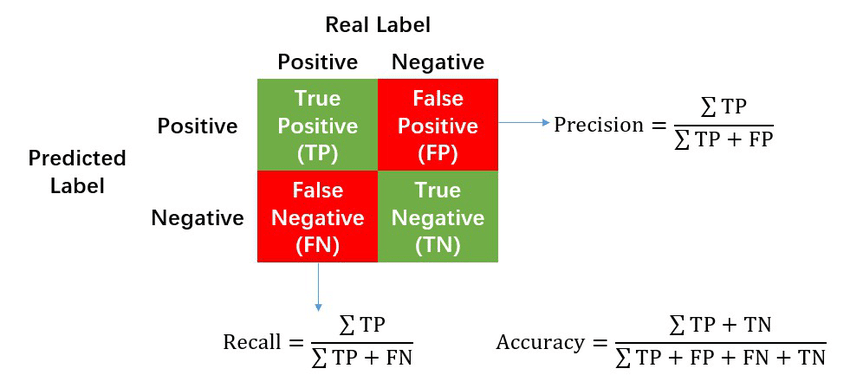

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.94      0.92       504
                                 Apple___Black_rot       0.93      0.99      0.96       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.94      0.92      0.93       502
                               Blueberry___healthy       0.90      0.97      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.96      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.90      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.92      0.

In [48]:
cm=confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

In [49]:
cm

array([[473,   2,   0, ...,   0,   0,   0],
       [  1, 493,   0, ...,   0,   0,   0],
       [  3,   0, 421, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 481,   0,   0],
       [  0,   0,   0, ...,   0, 443,   0],
       [  0,   0,   2, ...,   0,   0, 437]], dtype=int64)

### confusion matrix visualisation

<Axes: >

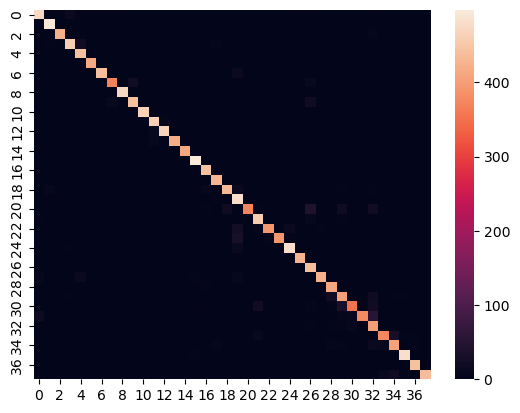

In [52]:
#seaborn https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(cm)

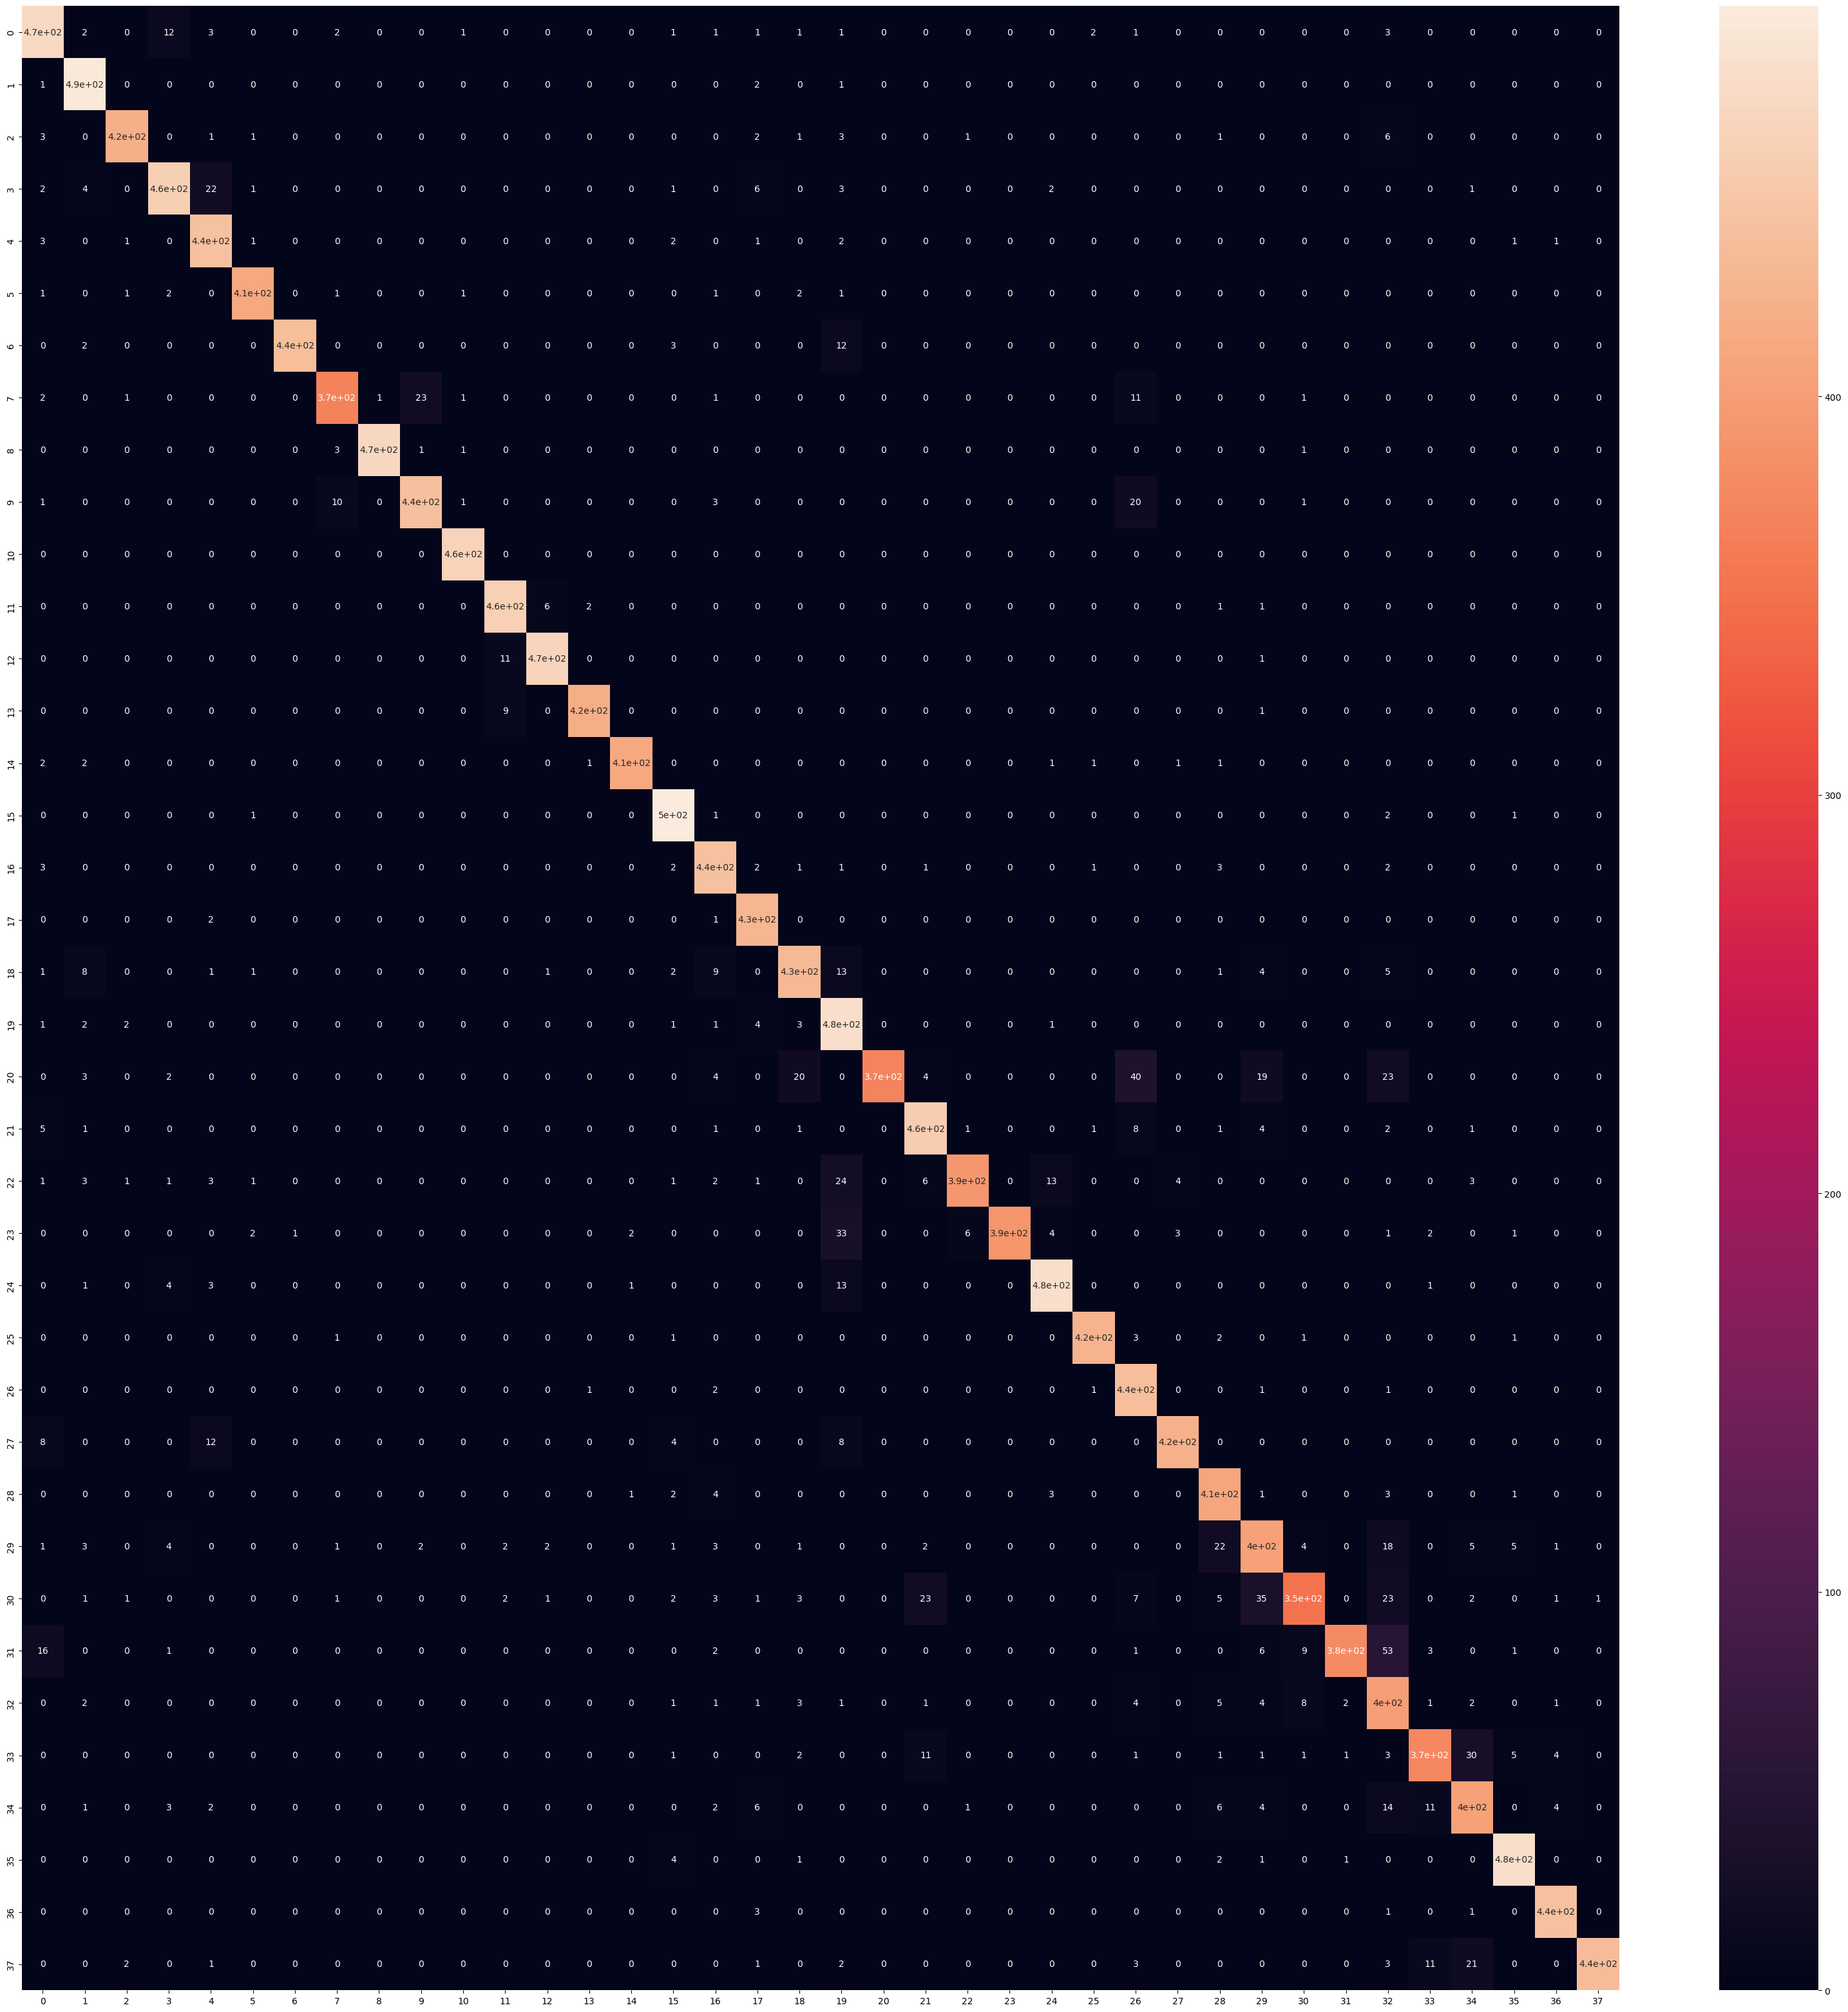

In [54]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.show()

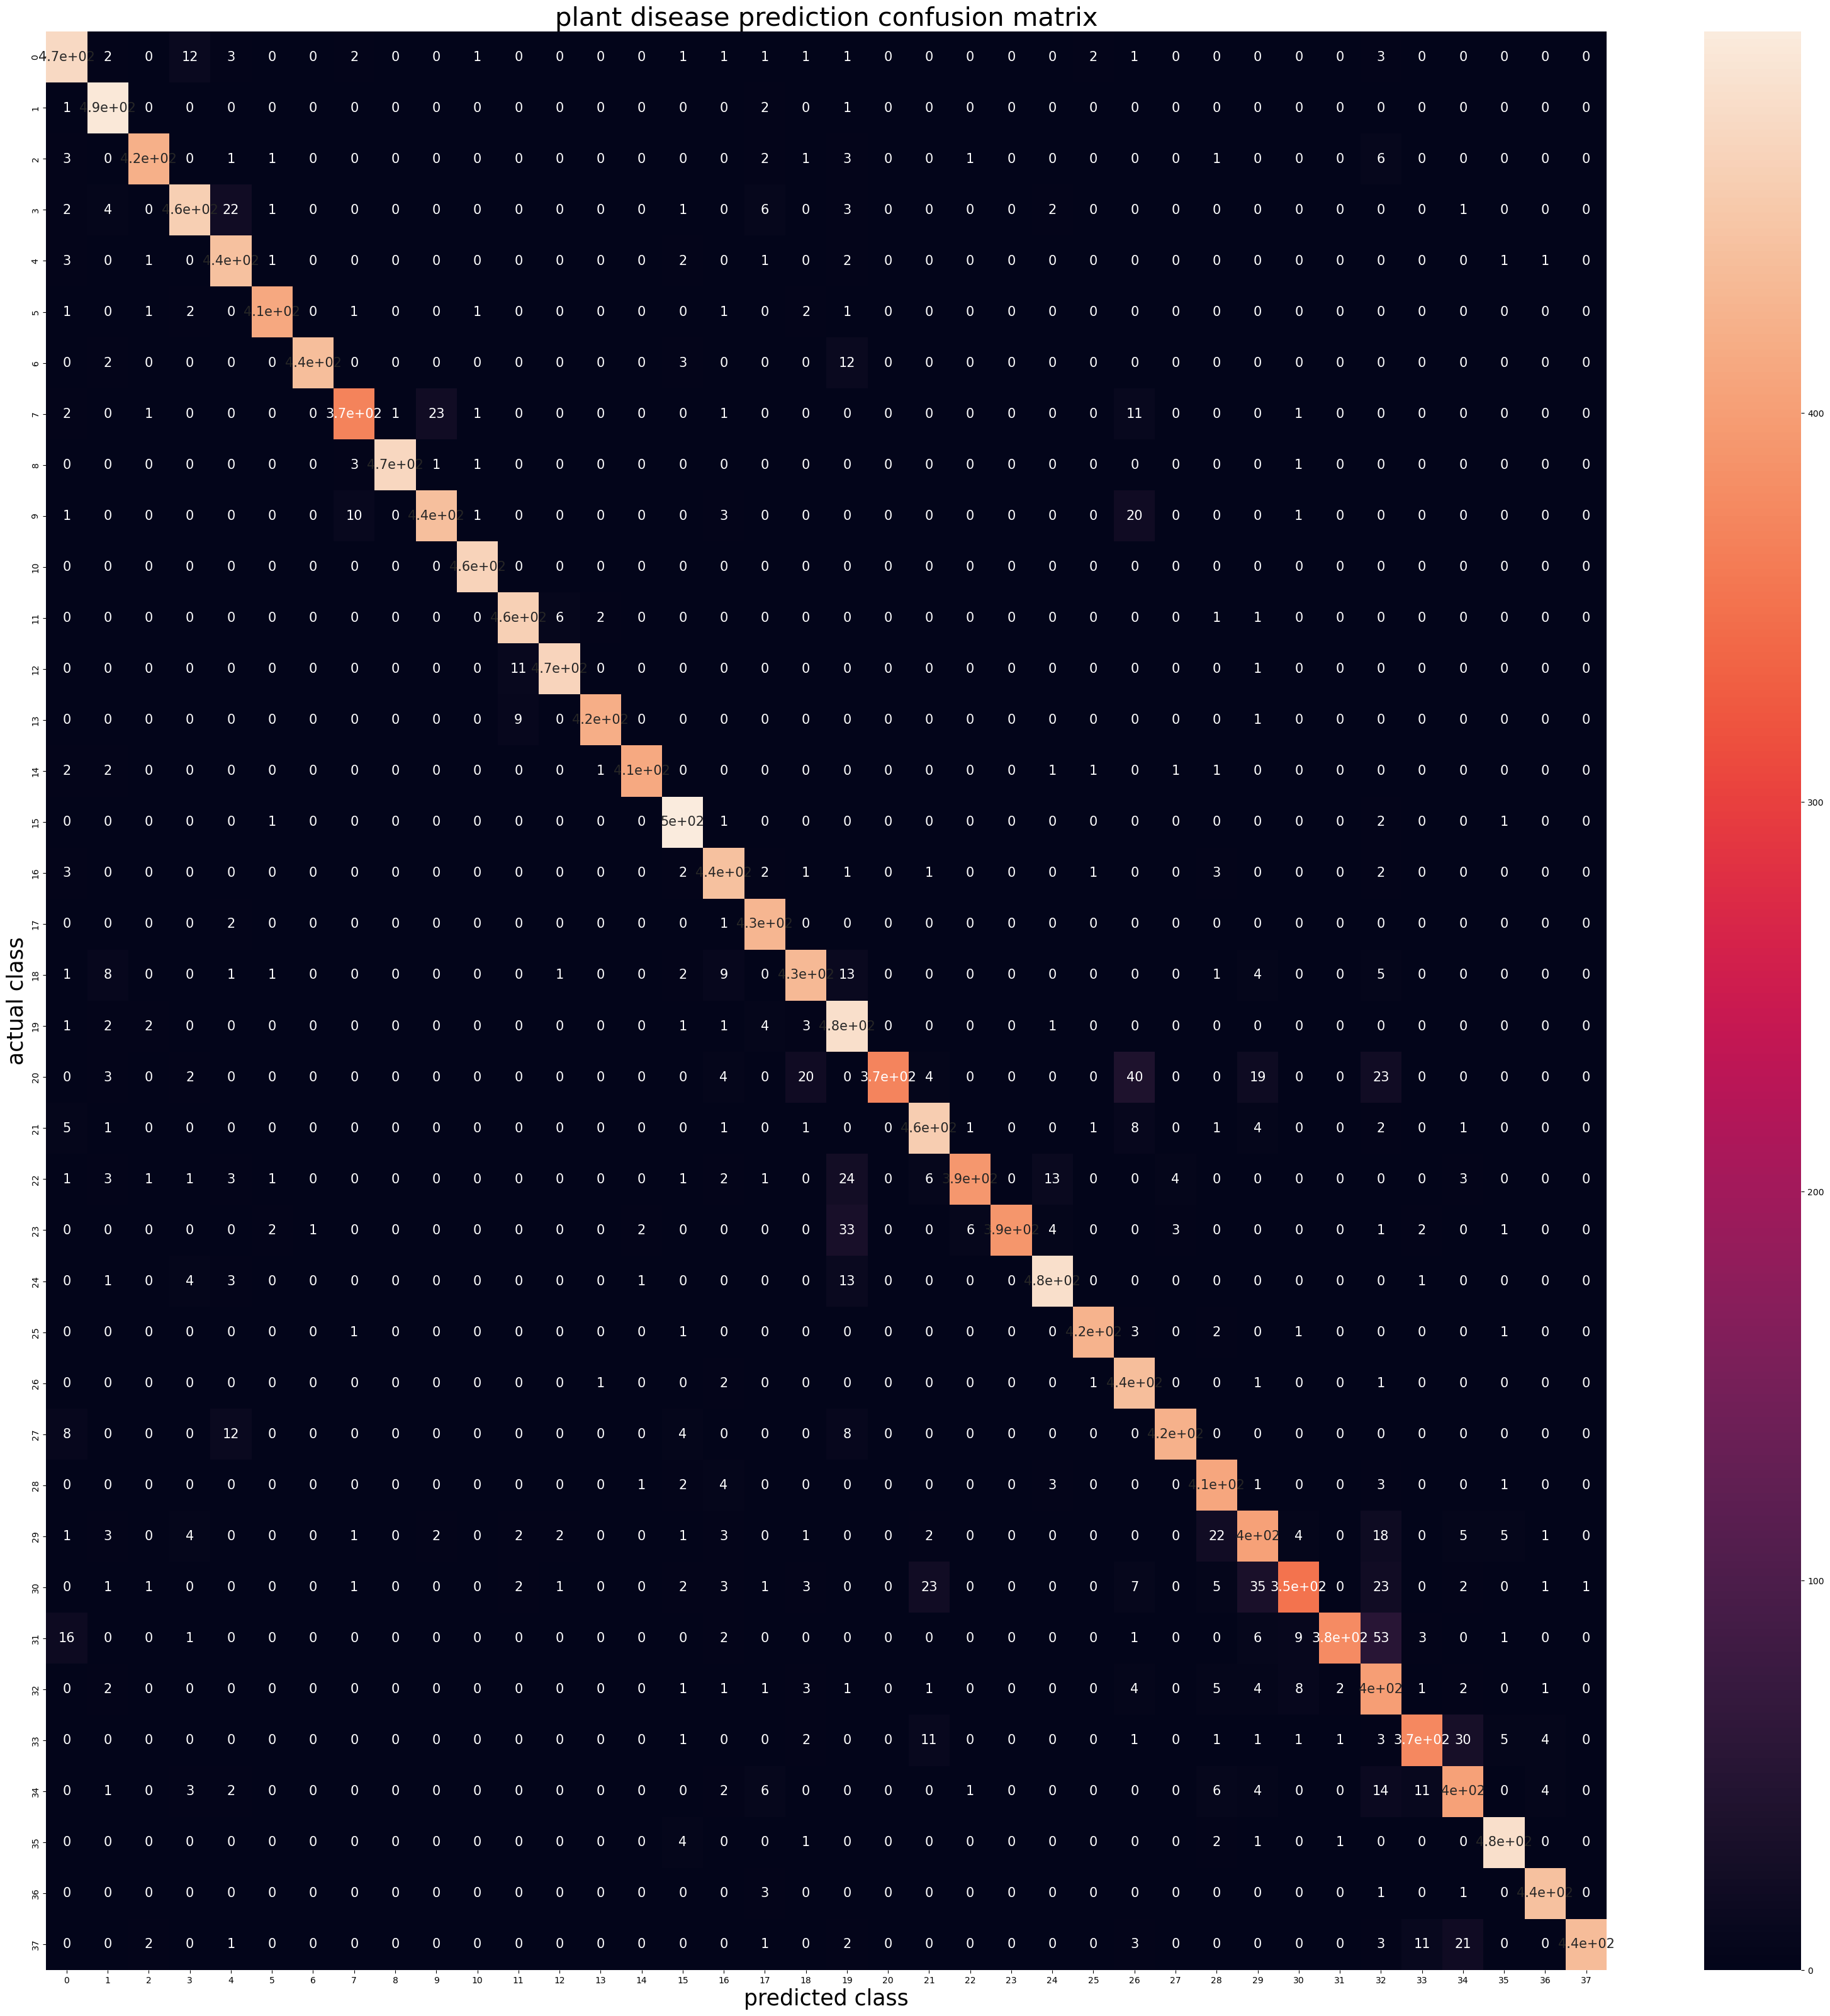

In [59]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':15})#annotation size 10
plt.xlabel("predicted class",fontsize=25)
plt.ylabel("actual class",fontsize=25)
plt.title("plant disease prediction confusion matrix",fontsize=30)
plt.show()